The MNIST (Modified National Institute of Standards and Technology) dataset consists of images of handwritten digits that is used for training and testing image processing systems

This is a multiclass classification problem in which the goal is to predict a single discrete label (0,1,2,3,4,5,6,7,8,9)

This notebook is used to generate a predictive model for the production system

In [1]:
from tensorflow.keras.datasets import mnist # mnist dataset
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

from skimage import io, transform, util
import os

import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra

Loading MNIST dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

Linear model definition

The output of the network is a layer of size 10 with a probability distribution over the 10 different classes

In [5]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

Compiling the model

The chosen loss function is categorical_crossentropy because is a multiclass classification problem

In [6]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Encoding the data

In [7]:
train_images_prepared = train_images.reshape((60000, 28 * 28))
train_images_prepared = train_images_prepared.astype('float32') / 255

test_images_prepared = test_images.reshape((10000, 28 * 28))
test_images_prepared = test_images_prepared.astype('float32') / 255

In [8]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

Setting a validation set of 6000 samples from 60000 training images

In [9]:
train_images_val = train_images_prepared[:6000]
train_images_partial = train_images_prepared[6000:]

train_labels_val = train_labels_one_hot[:6000]
train_labels_partial = train_labels_one_hot[6000:]

Training the model for 10 epochs or passes over the entire dataset

In [10]:
history = model.fit(train_images_partial, train_labels_partial, epochs=10, batch_size=128, validation_data=(train_images_val, train_labels_val))

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 6s 108us/step - loss: 0.2693 - acc: 0.9224 - val_loss: 0.1361 - val_acc: 0.9588
Epoch 2/10
54000/54000 [==============================] - 5s 86us/step - loss: 0.1112 - acc: 0.9667 - val_loss: 0.0912 - val_acc: 0.9732
Epoch 3/10
54000/54000 [==============================] - 3s 58us/step - loss: 0.0726 - acc: 0.9787 - val_loss: 0.0859 - val_acc: 0.9735
Epoch 4/10
54000/54000 [==============================] - 3s 58us/step - loss: 0.0529 - acc: 0.9838 - val_loss: 0.0764 - val_acc: 0.9747
Epoch 5/10
54000/54000 [==============================] - 3s 58us/step - loss: 0.0391 - acc: 0.9884 - val_loss: 0.0745 - val_acc: 0.9773
Epoch 6/10
54000/54000 [==============================] - 3s 62us/step - loss: 0.0299 - acc: 0.9912 - val_loss: 0.0699 - val_acc: 0.9803
Epoch 7/10
54000/54000 [==============================] - 3s 63us/step - loss: 0.0222 - acc: 0.9935 - val_loss: 0.0676 - val_acc

Plotting training and validation loss

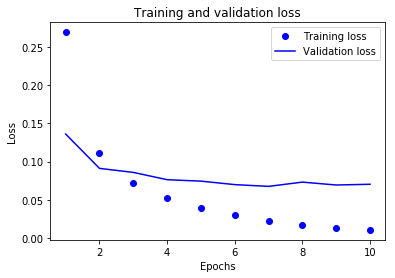

In [11]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotting training and validation accuracy

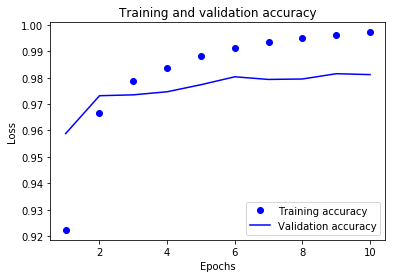

In [12]:
acc = history.history['acc']
validation_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, validation_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Overfit begins after 5 epochs

Retraining the model from scratch for 5 epochs to avoid overfit. Note that validation set is not used for this time

In [13]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images_prepared, train_labels_one_hot, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.2569 - acc: 0.9266
Epoch 2/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.1052 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0691 - acc: 0.9789
Epoch 4/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0498 - acc: 0.9850
Epoch 5/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.0373 - acc: 0.9890


Save MNIST model for production system

In [14]:
model.save('app/mnist_model.h5')
del model
model = load_model('app/mnist_model.h5')

Model evaluation

In [15]:
final_loss, final_acc = model.evaluate(test_images_prepared, test_labels_one_hot)

10000/10000 [==============================] - 1s 52us/step


Final results

In [16]:
print('Final loss: {0}'.format(final_loss))
print('Final accuracy: {0}'.format(final_acc))

Final loss: 0.07552170741255396
Final accuracy: 0.9768


Generating predictions for two samples of numbers 4 and 9 from test images

First sample is a number 4 from test images

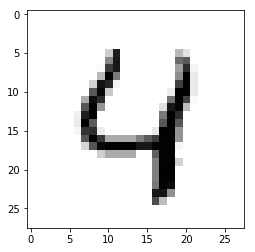

In [17]:
digit = test_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [18]:
test_labels[4]

4

In [19]:
prediction = model.predict(test_images_prepared[4:5], batch_size=784)
print(prediction)

[[6.5164194e-08 1.0987159e-10 5.4261386e-07 8.3557815e-08 9.7565311e-01
  4.1773944e-08 9.2240427e-08 2.0984227e-05 2.0405821e-06 2.4323082e-02]]


The highest likelihood is above 0.99 for number 4

Generate predictions for example image

In [20]:
APP_ROOT = os.path.dirname(os.path.abspath("Deep Learning MNIST prediction model with Keras.ipynb"))
APP_STATIC = os.path.join(APP_ROOT, 'app/static')

filename = "4.jpg"
path_to_file = os.path.join(APP_STATIC, filename)
image = io.imread(path_to_file, as_gray=True) # read as grayscale

In [21]:
def preprocess_image(image):
    # invert grayscale image
    image = util.invert(image)
    # resize image and prepare it for model
    image = transform.resize(image, (28,28), anti_aliasing=True, mode="constant")
    image = np.array(image)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.show()
    image = image.reshape((1,28*28))

    return image

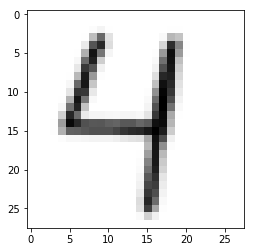

In [22]:
preprocessed_image=preprocess_image(image)

In [23]:
preds = model.predict(preprocessed_image)
preds

array([[8.0255100e-09, 1.9455256e-05, 1.4459256e-05, 9.0474996e-06,
        9.9718273e-01, 7.5980934e-06, 1.1683321e-06, 1.8591178e-03,
        5.1540881e-04, 3.9107347e-04]], dtype=float32)

The highest likelihood is above 0.99 for number 4

In [24]:
np.argmax(preds)

4